## The data

Let's get started by importing libraries and loading the data


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame(
    {
        "value": [10, 15, 8, 12, 20, 18],
        "category": ["A", "A", "B", "B", "C", "C"],
        "sub_category": ["X", "Y", "X", "Y", "X", "Y"],
    }
)
data

,value,category,sub_category
0,10,A,X
1,15,A,Y
2,8,B,X
3,12,B,Y
4,20,C,X
5,18,C,Y


## Default grouped barplot

- `pivot_df` reshapes the data so that each row is a **category** and each column is a **sub-category**.
- `x` gives the base x-positions for the categories.
- The `for` loop goes through each **sub-category** and offsets its bars horizontally using `i * bar_width` so they appear grouped.
- Each `ax.bar()` call draws one set of bars (for one sub-category) at the correct shifted position.


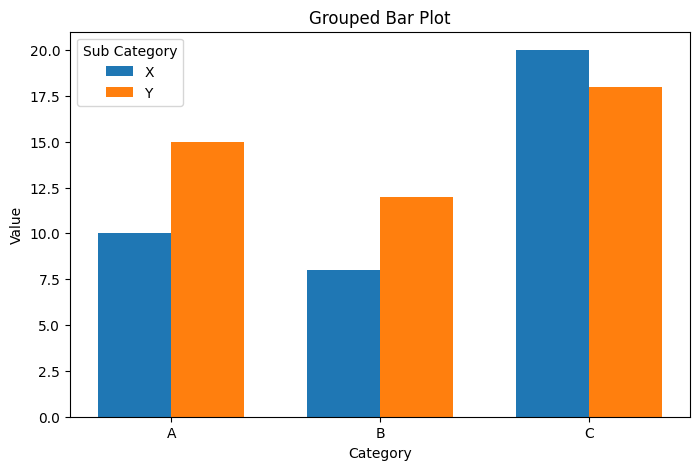

In [3]:
pivot_df = data.pivot(index="category", columns="sub_category", values="value")

fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = np.arange(len(pivot_df.index))
for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(x + i * bar_width, pivot_df[sub_cat], width=bar_width, label=sub_cat)

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Grouped Bar Plot")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sub Category")

plt.show()

## Total values in the background

This version adds **total bars** behind the grouped bars.

- It first calculates `totals` for each category (sum across sub-categories).
- `ax.bar(x, totals, ...)` draws **wide, light grey bars** as a background, showing the total per category.
- The `for` loop then overlays the **narrower, colored bars** for each sub-category, centered around each category position.

So while both use a loop to draw grouped bars, **this one also visualizes the total**, making it easier to compare individual sub-category values to the whole. The offset `(i - 0.5) * bar_width` ensures the grouped bars are centered over the total bar.


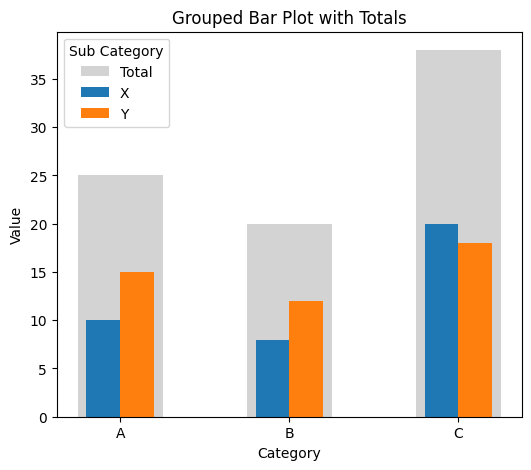

In [4]:
pivot_df = data.pivot(index="category", columns="sub_category", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.2
x = np.arange(len(pivot_df.index))

ax.bar(x, totals, width=bar_width * 2.5, color="lightgrey", zorder=0, label="Total")

for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(
        x + (i - 0.5) * bar_width,
        pivot_df[sub_cat],
        width=bar_width,
        label=sub_cat,
        zorder=1,
    )

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Grouped Bar Plot with Totals")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sub Category")

fig.savefig(
    "../../static/graph/grouped-barplot-with-the-total-of-each-group-represented-as-a-grey-rectangle.png",
    dpi=100,
)
plt.show()

## Customization

Let's make it look nicer!


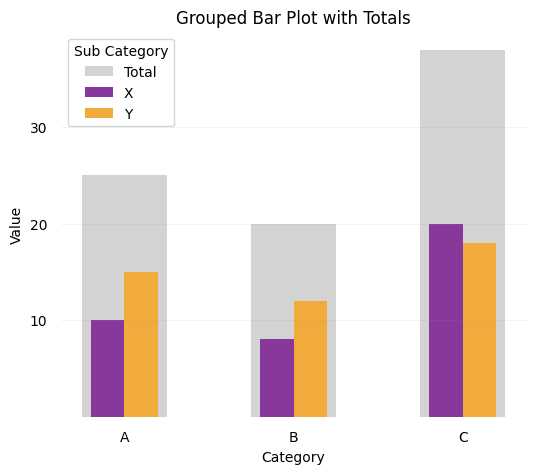

In [16]:
pivot_df = data.pivot(index="category", columns="sub_category", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.2
x = np.arange(len(pivot_df.index))
colors = ["#88389a", "#f0ab3c"]

ax.bar(x, totals, width=bar_width * 2.5, color="lightgrey", zorder=0, label="Total")

for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(
        x + (i - 0.5) * bar_width,
        pivot_df[sub_cat],
        width=bar_width,
        label=sub_cat,
        zorder=1,
        color=colors[i],
    )

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Grouped Bar Plot with Totals")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Sub Category")
ax.set_yticks([10, 20, 30])
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.grid(axis="y", alpha=0.2, lw=0.4, color="#949494")
ax.tick_params(size=0, pad=10)

fig.savefig(
    "../../static/graph/grouped-barplot-with-the-total-of-each-group-represented-as-a-grey-rectangle-2.png",
    dpi=100,
)
plt.show()


## Going further

- Learn more about [barplots](https://python-graph-gallery.com/barplot/)
- How to create a [stacked barplot](https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/)
- How to create a [percent stacked barplot](https://python-graph-gallery.com/13-percent-stacked-barplot/)
